In [4]:
## Capstone Project Notebook

--2020-07-12 20:10:28--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.001s  

2020-07-12 20:10:28 (16.8 MB/s) - ‘loan_train.csv’ saved [23101/23101]

   Unnamed: 0  Unnamed: 0.1 loan_status  Principal  terms effective_date  \
0           0             0     PAIDOFF       1000     30       9/8/2016   
1           2             2     PAIDOFF       1000     30       9/8/2016   
2           3             3     PAIDOFF       1000     15       9/8/2016   
3           4             4     PAIDOFF       1000 

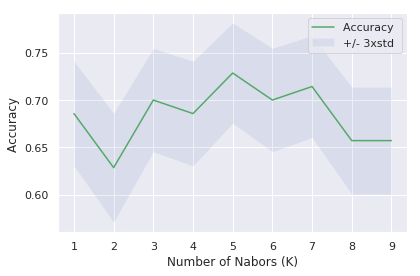

The best accuracy was with 0.7285714285714285 with k= 5
Jaccard for KNN : 0.6571428571428571
F1 Score for KNN: 0.7818181818181819


In [9]:
### K-Nearest Neighbour

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns
import csv
import time
import datetime

sns.set()
from sklearn.cluster import KMeans
from sklearn import metrics

!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

fields = ['unamed: 0','unamed: 0.1','loan_status','Principal','terms','effective_date','due_date','age','education','gender']

## Converting Data to numeric values. 

df = pd.read_csv('loan_train.csv')
print(df.head())

###################################################################
## Convert data into numeric values and copy it to data_file.csv
## Paid off = 1, collection = 0
## male = 1 , female = 0
## Bechalor = 0, High School or Below = 1, College = 2, Master or Above  = 3
## effective_date, due_date epoch time 
#########################################################################


with open('loan_train.csv','r') as csv_file:
        with open('data_file.csv','w') as file:
            writer= csv.writer(file)
            writer.writerow(fields)
            csv_reader = csv.reader(csv_file)
            i = 0
            for row in csv_reader:
                if i > 0 :
           
                    j = 0
                    for k in row:
                        if j == 0:
                            zero = row[j]
                    
                        if  j == 1:
                            one = row[j]
                         
                        if j == 2:
                            if row[j] == "PAIDOFF":
                                two = 1
                            else:
                                #collection
                                two = 0
                          

                        if j == 3:
                            three = row[j]
                            
                        if j == 4:
                            fourth = row[j]
                        
                        if j == 5:
                            fifth = row[j]
                            dt = datetime.datetime.strptime(row[j], "%m/%d/%Y")
                            fifth = time.mktime(dt.timetuple())
                        if j == 6:
                           
                            dt =datetime.datetime.strptime(row[j],"%m/%d/%Y")
                            sixth = time.mktime(dt.timetuple())

                        if j == 7:
                            seven = row[j]
                        if j == 8:
                            if row[j] == "Bechalor":
                                eight = 0
                            if row[j] == "High School or Below":
                                eight = 1
                            if row[j] == "college":
                                eight = 2
                            if row[j] == "Master or Above":
                                eight = 3
                        if j == 9:
                            if row[j] == "male":
                                nine = 1
                            else:
                                nine = 0
               
                        j = j + 1
                  
                    writer.writerow([zero,one,two,three,fourth,fifth,sixth,seven,eight,nine])

                i = i + 1

###################################################################


df = pd.read_csv('data_file.csv')
print(df.head())


X = df[['Principal','terms','effective_date','due_date','education','age']].values
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

#Normalize Values.
Y =  df['loan_status'].values
df['loan_status'].value_counts()


#Splitting the data into training and test sets (80:20)
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=4)

print('Train set:',X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
   
### Test the Model ###
    
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat) 
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

print(mean_acc)

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()


####################### Printing Accuracy of the Model ##################

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score

j_score = jaccard_similarity_score(y_test,yhat)
f1_score = f1_score(y_test,yhat)

print("Jaccard for KNN :", j_score)
print("F1 Score for KNN:", f1_score)










In [12]:
## Decision Tree Classifier 

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import csv
import datetime
import time

!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

data = pd.read_csv("loan_train.csv",delimiter=",")   

fields = ['loan_status','Principal','terms','education','gender']

#################################################
## Convert data and copy it into data_file1.csv 
##  gender, education and terms are considered for decision tree classifier
## 30 --> max, 15 --> medium, 7 --> low 
###############################################

with open('loan_train.csv','r') as csv_file:
        with open('data_file1.csv','w') as file:
            writer= csv.writer(file)
            writer.writerow(fields)
            csv_reader = csv.reader(csv_file)
            i = 0
            for row in csv_reader:
                if i > 0 :
                    j = 0
                    for k in row:
                        if j == 0:
                            zero = row[j]
                        if  j == 1:
                            one = row[j]
                           
                        if j == 2:
                            if row[j] == "PAIDOFF":
                                two = 1
                            else:
                                #collection
                                two = 0
                        if j == 3:
                            three = row[j]
                       
                        if j == 4:
    
                            if row[j] == "30":
                                fourth = "max"
                            if row[j] == "15":
                                fourth = "medium"
                            if row[j] == "7":
                                fourth = "low"
                        if j == 5:
                            fifth = row[j]
                            dt = datetime.datetime.strptime(row[j], "%m/%d/%Y")
                            fifth = time.mktime(dt.timetuple())
                        if j == 6:
                           
                            dt =datetime.datetime.strptime(row[j],"%m/%d/%Y")
                            sixth = time.mktime(dt.timetuple())                         

                        if j == 7:
                            seven = row[j]
                        if j == 8:
                         
                                eight = row[j]
                            
                        if j == 9:
                                nine = row[j]

                        j = j + 1
             
                    writer.writerow([two,three,fourth,eight,nine])

                i = i + 1


##############################################################################

data  = pd.read_csv("data_file1.csv",delimiter=",") 
X= data[['loan_status','Principal','terms','education','gender']].values
X[0:10]


from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()

le_sex.fit(['male','female'])
X[:,4] = le_sex.transform(X[:,4])


le_education = preprocessing.LabelEncoder()
le_education.fit(['Bechalor','High School or Below','college','Master or Above'])
X[:,3] = le_education.transform(X[:,3])


le_terms = preprocessing.LabelEncoder()
le_terms.fit(['max','medium','low'])
X[:,2] = le_terms.transform(X[:,2])

#le_Principal = preprocessing.LabelEncoder()
#le_Principal.fit(['1000','800','300','900','500'])
#X[:,1] = le_Principal.transform(X[:,1])


y = data['loan_status']

y[0:5]

### Split Data into Train and Test ############

from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.4, random_state=3)


statusTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
statusTree # it shows the default parameters
statusTree.fit(X_trainset,y_trainset)

###### Test the model on Test Set ######

predTree = statusTree.predict(X_testset)
print (predTree [0:5])
print (y_testset [0:5])


################################# Accuracy of the Model###################

from sklearn import metrics
import matplotlib.pyplot as plt
print("Decision Tree's Accuracy:", metrics.accuracy_score(y_testset,predTree))


from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score

j_score = jaccard_similarity_score(y_testset,predTree)
f1_score = f1_score(y_testset,predTree)

print("Jaccard for Decision Tree :", j_score)
print("F1 Score for Decision Tree:", f1_score)



--2020-07-12 20:19:05--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.002s  

2020-07-12 20:19:05 (11.7 MB/s) - ‘loan_train.csv’ saved [23101/23101]

[1 1 0 0 1]
73     1
24     1
282    0
295    0
163    1
Name: loan_status, dtype: int64
Decision Tree's Accuracy: 1.0
Jaccard for Decision Tree : 1.0
F1 Score for Decision Tree: 1.0


In [15]:
## Logictic Regression 

import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt
import csv
import time
import datetime

fields = ['Unnamed: 0','Unnamed: 0.1','loan_status','Principal','terms','effective_date','due_date','age','education','gender']


!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
## Converting Data to numeric values. 

df = pd.read_csv('loan_train.csv')

###################################################################
## Convert data into numeric values and copy it to data_file.csv
## Paid off = 1, collection = 0
## male = 1 , female = 0
## Bechalor = 0, High School or Below = 1, College = 2, Master or Above  = 3
## effective_date, due_date  will get translated to epoch time 
#########################################################################



with open('loan_train.csv','r') as csv_file:
        with open('data_file.csv','w') as file:
            writer= csv.writer(file)
            writer.writerow(fields)
            csv_reader = csv.reader(csv_file)
            i = 0
            for row in csv_reader:
             
                if i > 0 :
                  
                    j = 0
                    for k in row:
                        if j == 0:
                            zero = row[j]
                        
                        if  j == 1:
                            one = row[j]
                       
                        if j == 2:
                            if row[j] == "PAIDOFF":
                                two = 1
                            else:
                                #collection
                                two = 0                     

                        if j == 3:
                            three = row[j]
                         
                        if j == 4:
                            fourth = row[j]
                    
                        if j == 5:
                            fifth = row[j]
                            dt = datetime.datetime.strptime(row[j], "%m/%d/%Y")
                            fifth = time.mktime(dt.timetuple())
                        if j == 6:
                        
                            dt =datetime.datetime.strptime(row[j],"%m/%d/%Y")
                            sixth = time.mktime(dt.timetuple())
                          

                        if j == 7:
                            seven = row[j]
                        if j == 8:
                            if row[j] == "Bechalor":
                                eight = 0
                            if row[j] == "High School or Below":
                                eight = 1
                            if row[j] == "college":
                                eight = 2
                            if row[j] == "Master or Above":
                                eight = 3
                        if j == 9:
                            if row[j] == "male":
                                nine = 1
                            else:
                                nine = 0


                        j = j + 1
                    #print(zero,one,two,three,fourth,fifth,sixth,seven,eight,nine)
                    writer.writerow([zero,one,two,three,fourth,fifth,sixth,seven,eight,nine])

                i = i + 1

#######################################################################


df = pd.read_csv('data_file.csv')
(df.head())

df = df[['Unnamed: 0','Unnamed: 0.1','loan_status','Principal','terms','effective_date','due_date','age','education','gender']]
df['loan_status'] = df['loan_status'].astype('int')
df.head()

X = np.asarray(df[['Unnamed: 0','Unnamed: 0.1','loan_status','Principal','terms','effective_date','due_date','age','education','gender']])
X[0:5]

y = np.asarray(df['loan_status'])
y [0:5]

from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

##### Split Data into Train and Test ############

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)

print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01).fit(X_train,y_train)


############### Test the Model on the Test Set ###########

yhat = LR.predict(X_test)
yhat
yhat_prob = LR.predict_proba(X_test)
yhat_prob


############ Accuracy of the Model ################

from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score

j_score = jaccard_similarity_score(y_test,yhat)
f1_score = f1_score(y_test,yhat)

print("Jaccard for Logistic Regression :", j_score)
print("F1 Score for Logistic Regression:", f1_score) 


--2020-07-12 20:25:42--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.002s  

2020-07-12 20:25:42 (12.3 MB/s) - ‘loan_train.csv’ saved [23101/23101]

Train set: (276, 10) (276,)
Test set: (70, 10) (70,)
Jaccard for Logistic Regression : 1.0
F1 Score for Logistic Regression: 1.0


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [13]:
## Support Vector Machine

import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

fields = ['Unnamed: 0','Unnamed: 0.1','loan_status','Principal','terms','effective_date','due_date','age','education','gender']


!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
## Converting Data to numeric values. 

df = pd.read_csv('loan_train.csv')



###################################################################
## Convert data into numeric values and copy it to data_file.csv
## Paid off = 1, collection = 0
## male = 1 , female = 0
## Bechalor = 0, High School or Below = 1, College = 2, Master or Above  = 3
## effective_date, due_date is converted to epoch time 
#########################################################################


with open('loan_train.csv','r') as csv_file:
        with open('data_file.csv','w') as file:
            writer= csv.writer(file)
            writer.writerow(fields)
            csv_reader = csv.reader(csv_file)
            i = 0
            for row in csv_reader:
              

                if i > 0 :
                  
                    j = 0
                    for k in row:
                        if j == 0:
                            zero = row[j]
                        
                        if  j == 1:
                            one = row[j]
                       
                        if j == 2:
                            if row[j] == "PAIDOFF":
                                two = 1
                            else:
                                #collection
                                two = 0
                        

                        if j == 3:
                            three = row[j]
                         
                        if j == 4:
                            fourth = row[j]
                    
                        if j == 5:
                            fifth = row[j]
                            dt = datetime.datetime.strptime(row[j], "%m/%d/%Y")
                            fifth = time.mktime(dt.timetuple())
                        if j == 6:
                        
                            dt =datetime.datetime.strptime(row[j],"%m/%d/%Y")
                            sixth = time.mktime(dt.timetuple())
                    

                        if j == 7:
                            seven = row[j]
                        if j == 8:
                            if row[j] == "Bechalor":
                                eight = 0
                            if row[j] == "High School or Below":
                                eight = 1
                            if row[j] == "college":
                                eight = 2
                            if row[j] == "Master or Above":
                                eight = 3
                        if j == 9:
                            if row[j] == "male":
                                nine = 1
                            else:
                                nine = 0


                        j = j + 1
                  
                    writer.writerow([zero,one,two,three,fourth,fifth,sixth,seven,eight,nine])

                i = i + 1
###############################################


df = pd.read_csv('data_file.csv')
(df.head())

df = df[pd.to_numeric(df['Unnamed: 0'], errors='coerce').notnull()]
df['Unnamed: 0'] = df['Unnamed: 0'].astype('int')
df.dtypes

df = df[pd.to_numeric(df['Unnamed: 0.1'], errors='coerce').notnull()]
df['Unnamed: 0.1'] = df['Unnamed: 0.1'].astype('int')
df.dtypes

feature_df = df[['Principal','terms','effective_date','due_date','age','education','gender']]
X = np.asarray(feature_df)
X[0:5]

df['loan_status'] = df['loan_status'].astype('int')
y = np.asarray(df['loan_status'])
y[0:5]


###### Break Data into Train and Test Set

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)


from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train,y_train)

##### Predict from Test Set

yhat = clf.predict(X_test)
yhat[0:5]

##### Accuracy of the Model ###

from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score

j_score = jaccard_similarity_score(y_test,yhat)
f1_score = f1_score(y_test,yhat)

print("Jaccard for SVM :", j_score)
print("F1 Score for SVM:", f1_score) 
    

--2020-07-12 20:19:54--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.002s  

2020-07-12 20:19:54 (10.8 MB/s) - ‘loan_train.csv’ saved [23101/23101]

--2020-07-12 20:19:55--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.2

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
